In [ ]:
#dataset
#http://scdb.wustl.edu/data.php

#codebook
#http://scdb.wustl.edu/documentation.php?var=decisionDirection
#In order to determine whether an outcome is liberal (=2) or conservative (=1), the following scheme is employed.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = 'SCDB_2021_01_caseCentered_Citation.dta'
columns = ['dateArgument', 'decisionDirection'] #columns to use
#columns parameter limits to necessary columns
df = pd.read_stata(file, convert_categoricals = False, columns = columns) 
df.head()


,dateArgument,decisionDirection
0,1946-01-09,2.0
1,1945-10-10,1.0
2,1945-11-08,2.0
3,1946-01-31,2.0
4,1946-10-25,2.0


Text(0.5, 1.0, '% Conservative Votes Over Time')

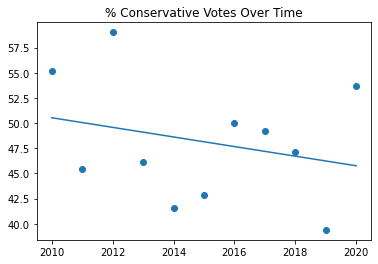

In [11]:
df['year'] = df['dateArgument'].dt.year #create year column

#restrict dataset to 2010-2020 
aughts_df = df[df['year']>=2010]
aughts_df = aughts_df[aughts_df['year']<=2020]
#create groupby as dataframe
dec_table = aughts_df.groupby('year')['decisionDirection'].value_counts(
    normalize=True).to_frame(
    name='percent').reset_index()
dec_table['percent'] = dec_table['percent'] *100
dec_table = dec_table[dec_table['decisionDirection'] == 1]
#create x and y variables for independent and dependent variables, respectively
x = dec_table['year']
y = dec_table['percent']
#visualize scatter
plt.scatter(x = x, y = y)

#add line of best fit to scatter
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)

#title 
plt.title('% Conservative Votes Over Time')

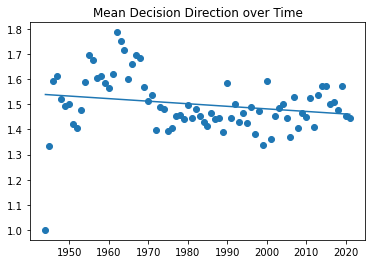

In [16]:
lc_df = df[df['decisionDirection']<=2]
mean_table = lc_df.groupby('year')['decisionDirection'].mean().to_frame(name = 'mean').reset_index()
ind= mean_table['year']
dep=  mean_table['mean']
plt.scatter(x=ind, y = dep)
plt.title('Mean Decision Direction over Time')
a, b = np.polyfit(ind, dep, 1)
plt.plot(ind, a*ind+b)